## Market1501 / cuhk03 

In [1]:
import keras
import tensorflow as tf
print('keras:\t', keras.__version__)
print('tf:\t', tf.__version__)

Using TensorFlow backend.


keras:	 2.1.6
tf:	 1.11.0


{'data_root': '/media/data/tanke/mvpose_data/pak'}

/media/data/tanke/mvpose_data/pak/cuhk03_release found :)
/media/data/tanke/mvpose_data/pak/Market-1501-v15.09.15 found :)
/media/data/tanke/mvpose_data/pak/DukeMTMC-reID found :)
found memmaped /media/data/tanke/mvpose_data/pak/cuhk03_release/labeled221x221.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /media/data/tanke/mvpose_data/pak/DukeMTMC-reID/bounding_box_test221x221.npy
load memmap /media/data/tanke/mvpose_data/pak/DukeMTMC-reID/bounding_box_train221x221.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270
(6, 221, 221, 6)
is same: [0 1]
is same: [1 0]
is same: [0 1]
is same: [1 0]
is same: [0 1]
is same: [1 0]


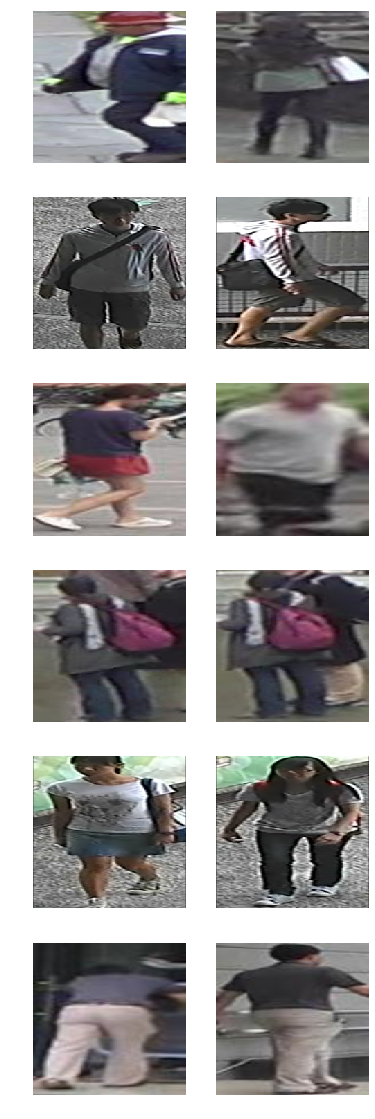

In [2]:
%matplotlib inline
import json
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
print('')
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from reid.data import DataSampler

from keras.callbacks import ModelCheckpoint, TerminateOnNaN
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from os.path import join, isfile, isdir, exists, splitext

root = Settings['data_root']

# target_w = 221
# target_h = 221
target_w = 221
target_h = 221


sampler = DataSampler(root, target_w, target_h)

npos = 3
nneg = 3
x, y = sampler.get_test_batch(npos, nneg)
#n = npos + nneg
n = len(x)
print(x.shape)

fig = plt.figure(figsize=(6, 20))
for pid in range(n):
    print('is same:', y[pid])
    im = x[pid]
    ax = fig.add_subplot(n, 2, pid*2+1); ax.axis('off')
    ax.imshow(im[:,:,0:3])
    ax = fig.add_subplot(n, 2, pid*2+2); ax.axis('off')
    ax.imshow(im[:,:,3:6])
plt.show()

## UMPM dataset

In [3]:
# from time import time
# from reid.data import UMPMSampler

# root = Settings['data_root']
# print(root)

# user = Settings['UMPM']['username']
# pwd = Settings['UMPM']['password']
# umpm_sampler = UMPMSampler(root, ['p2_chair_2'], user, pwd, target_w, target_h)


# _start = time()
# x, y = umpm_sampler.get_train()
# _end = time()
# print('elapsed', _end - _start)

# print('same', y[0])

# print(x.shape)

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(121)
# ax.imshow(x[0, :, :, 0:3].astype('uint8'))
# ax = fig.add_subplot(122)
# ax.imshow(x[0, :, :, 3:6].astype('uint8'))
# plt.show()

## MOT16 dataset

/media/data/tanke/mvpose_data/pak/MOT16 found :)
MOT16: load memmapped file /media/data/tanke/mvpose_data/pak/MOT16/train/MOT16-05/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 818
elapsed 0.04781651496887207
same [1 0]


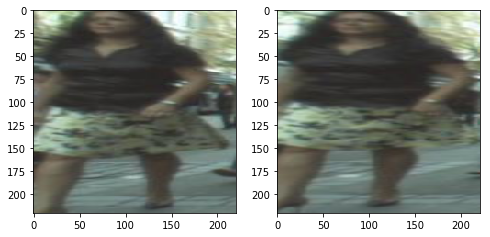

In [4]:
from reid.data import MOT16Sampler
from time import time

mot_sampler = MOT16Sampler(root, target_w, target_h, 'MOT16-05')


_start = time()
x, y = mot_sampler.sample()
_end = time()
print('elapsed', _end - _start)

print('same', y[0])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(121)
ax.imshow(x[0,:,:,0:3].astype('uint8'))
ax = fig.add_subplot(122)
ax.imshow(x[0,:,:,3:6].astype('uint8'))
plt.show()

/media/data/tanke/mvpose_data/pak/MOT16 found :)
MOT16: load memmapped file /media/data/tanke/mvpose_data/pak/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1736
/media/data/tanke/mvpose_data/pak/MOT16 found :)
MOT16: load memmapped file /media/data/tanke/mvpose_data/pak/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1736
/media/data/tanke/mvpose_data/pak/MOT16 found :)
MOT16: load memmapped file /media/data/tanke/mvpose_data/pak/MOT16/train/MOT16-05/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 818
/media/data/tanke/mvpose_data/pak/MOT16 found :)
MOT16: load memmapped file /media/data/tanke/mvpose_data/pak/MOT16/train/MOT16-09/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1872
/media/data/tanke/mvpose_data/pak/MOT16 f

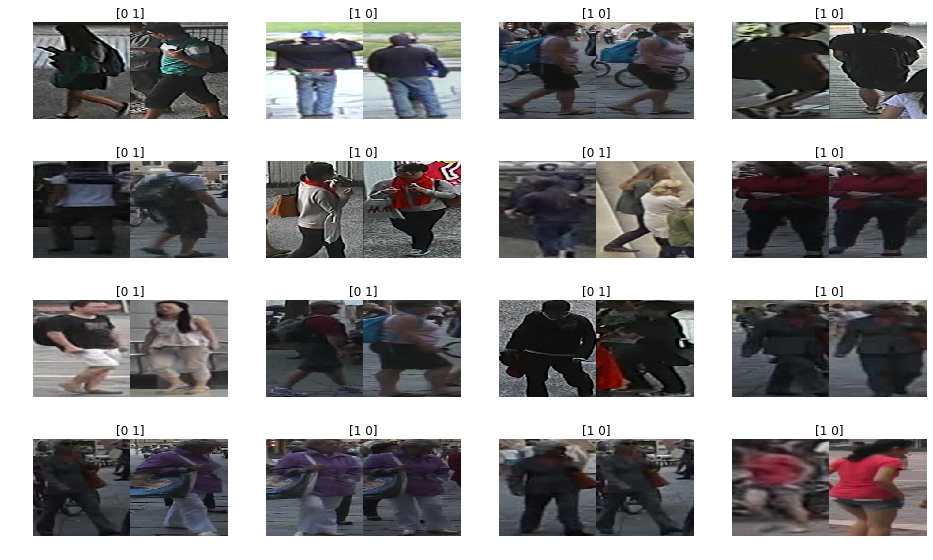

In [5]:
from reid.data import Data
import numpy as np
root = Settings['data_root']
# user = Settings['UMPM']['username']
# pwd = Settings['UMPM']['password']


sampler = Data(root, target_w, target_h)
print('------------')


x, y = sampler.train()

fig = plt.figure(figsize=(16,20))
for idx, im in enumerate(x):
    ax = fig.add_subplot(8, 4, idx+1); ax.axis('off')
    Im = np.concatenate([im[:,:,0:3], im[:,:,3:6]], axis=1).astype('uint8')
    ax.imshow(Im)
    ax.set_title(str(y[idx]))
    
plt.show()

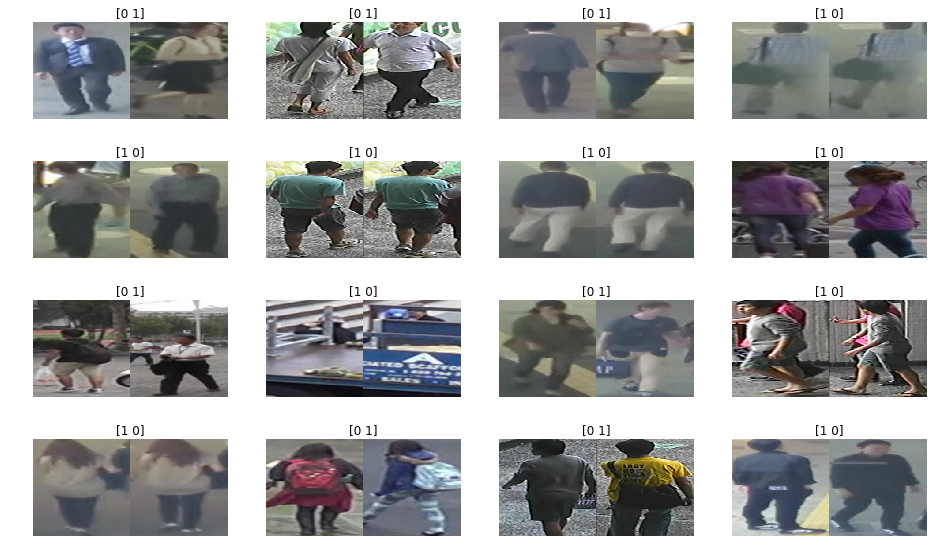

In [6]:
x, y = sampler.test()

fig = plt.figure(figsize=(16,20))
for idx, im in enumerate(x):
    ax = fig.add_subplot(8, 4, idx+1); ax.axis('off')
    Im = np.concatenate([im[:,:,0:3], im[:,:,3:6]], axis=1).astype('uint8')
    ax.imshow(Im)
    ax.set_title(str(y[idx]))
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


y: 0


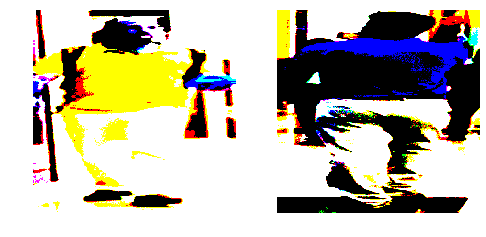

In [7]:
#from keras.applications.xception import preprocess_input
#from keras.applications.resnet50 import preprocess_input

def generate_training():
    global sampler
    while True:
        X, Y = sampler.train(add_noise=True)
        X_a = preprocess_input(X[:,:,:,0:3])
        X_b = preprocess_input(X[:,:,:,3:6])
        yield ([X_a, X_b], Y[:, 0])
        
def generate_test():
    global sampler
    while True:
        X, Y = sampler.test()
        X_a = preprocess_input(X[:,:,:,0:3])
        X_b = preprocess_input(X[:,:,:,3:6])
        yield ([X_a, X_b], Y[:, 0])

        
# ------------------------
gen = generate_training()

(Xa, Xb), Y = next(gen)

i = 5
print("y:", Y[i])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121); ax.axis("off")
ax.imshow(Xa[i])
ax = fig.add_subplot(122); ax.axis("off")
ax.imshow(Xb[i])

plt.show()

## Training

In [8]:
import h5py

def insert_conv(model, key, conv_h5):
    """ insert conv layer into model
    :param model:
    :param key:
    :param conv_h5:
    :return:
    """
    convl = model.get_layer(key)
    kernel = conv_h5.get('kernel:0')[()]
    convl.set_weights([kernel])
    
def insert_sepconv(model, key, sepconv_h5):
    """ insert conv layer into model
    :param model:
    :param key:
    :param conv_h5:
    :return:
    """
    convl = model.get_layer(key)
    dkernel = sepconv_h5.get('depthwise_kernel:0')[()]
    pkernel = sepconv_h5.get('pointwise_kernel:0')[()]
    convl.set_weights([dkernel, pkernel])

def insert_bn(model, key, bn_h5):
    """ insert the bn layer into the model
    :param model:
    :param key:
    :param bn_h5:
    :return:
    """
    print('insert bn:', key)
    beta = bn_h5.get('beta:0')[()]
    gamma = bn_h5.get('gamma:0')[()]
    mm = bn_h5.get('moving_mean:0')[()]
    mv = bn_h5.get('moving_variance:0')[()]
    bn_layer = model.get_layer(key)
    bn_layer.set_weights([beta, gamma, mm, mv])
    
def insert_fc(model, key, fc_h5):
    print('insert fc:', key)
    bias = fc_h5.get('bias:0')[()]
    kernel = fc_h5.get('kernel:0')[()]
    hidden_layer = model.get_layer(key)
    hidden_layer.set_weights([kernel, bias])


def load_weights(model, filepath):
    if isfile(filepath):
        with h5py.File(filepath, 'r') as f:
            model_weights = f.get('model_weights')
            
            for fc in ['dense_1', 'dense_2', 'dense_3']:
                fcl = model_weights.get(fc).get(fc)
                insert_fc(model, fc, fcl)
            
            
            
            seq = model_weights.get('sequential_1')
            for layer in seq.layers:
                name = layer.name
                #if name.starts_with('batch_normalization') or
            
#             print(list(seq))
            
#             ll = seq.get('block10_sepconv1')
            
#             print(list(ll.keys()))
            
            
            #for layer in 

#load_weights(model, filepath)

In [9]:
# for l in model.layers:
#     print(l.name)

In [10]:
#from keras.applications.densenet import DenseNet121, preprocess_input
from keras.applications.xception import Xception, preprocess_input
#from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, concatenate
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import load_model

filepath = join(root, 'reid.h5')
print('model:', filepath)

print('constructing...')
seq = Sequential()
xception = Xception(weights='imagenet', input_shape=(221, 221, 3),
    include_top=False, pooling='avg')
seq.add(xception)
# seq.add(ResNet50(weights='imagenet', input_shape=(221, 221, 3),
#                 include_top=False, pooling='avg'))

# freeze first layers in pre-trained model
for layer in xception.layers[0:-20]:
    layer.trainable = False

#seq.add(Flatten())

input_a = Input(shape=(221, 221, 3))
input_b = Input(shape=(221, 221, 3))

out_a = seq(input_a)
out_b = seq(input_b)

concatenated = concatenate([out_a, out_b])
hidden1 = Dense(128, activation='relu', name='dense_1')(concatenated)
hidden_drp1 = Dropout(0.7)(hidden1)
hidden2 = Dense(32, activation='relu', name='dense_2')(hidden_drp1)
hidden_drp2 = Dropout(0.1)(hidden2)
out = Dense(1, activation='sigmoid', name='dense_3')(hidden_drp2)

model = Model([input_a, input_b], out)

if isfile(filepath):
    print('weights found... loading...')
    #model = load_model(filepath)
    model.load_weights(filepath)

model: /media/data/tanke/mvpose_data/pak/reid.h5
constructing...
weights found... loading...


In [11]:
from keras.optimizers import SGD, RMSprop, Nadam, Adam, Adadelta

#optimizer = Nadam()
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = Nadam(lr=0.001)
loss = 'binary_crossentropy'
metrics = ['binary_accuracy', 'acc']

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)


#model.load_weights(filepath)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 2048)         20861480    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 4096)         0           sequential_1[1][0]               
          

In [ ]:
from keras.callbacks import ModelCheckpoint, TerminateOnNaN

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1, 
                             save_weights_only=True,
                             save_best_only=True, 
                             mode='max')
callbacks_list = [checkpoint, TerminateOnNaN()]

history = model.fit_generator(generate_training(), 
                             validation_data=generate_test(),
                             validation_steps=50,
                             steps_per_epoch=100,
                             epochs=2000,
                             callbacks=callbacks_list)

acc = history.history['val_binary_accuracy']
tacc = history.history['binary_accuracy']

plt.plot(range(len(acc)), acc)
plt.plot(range(len(tacc)), tacc)
plt.show()

Epoch 1/2000
100/100 [==============================] - 46s 463ms/step - loss: 0.6979 - binary_accuracy: 0.4963 - acc: 0.4963 - val_loss: 0.6901 - val_binary_accuracy: 0.5262 - val_acc: 0.5262

Epoch 00001: val_acc improved from -inf to 0.52625, saving model to /media/data/tanke/mvpose_data/pak/reid.h5
Epoch 2/2000
100/100 [==============================] - 44s 441ms/step - loss: 0.6944 - binary_accuracy: 0.5319 - acc: 0.5319 - val_loss: 0.6959 - val_binary_accuracy: 0.5000 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.52625
Epoch 3/2000
100/100 [==============================] - 42s 417ms/step - loss: 0.6921 - binary_accuracy: 0.5181 - acc: 0.5181 - val_loss: 0.6950 - val_binary_accuracy: 0.4838 - val_acc: 0.4838

Epoch 00003: val_acc did not improve from 0.52625
Epoch 4/2000
100/100 [==============================] - 41s 407ms/step - loss: 0.6918 - binary_accuracy: 0.5231 - acc: 0.5231 - val_loss: 0.6944 - val_binary_accuracy: 0.5050 - val_acc: 0.5050

Epoch 00004: v


Epoch 00032: val_acc did not improve from 0.56625
Epoch 33/2000
100/100 [==============================] - 31s 310ms/step - loss: 0.6774 - binary_accuracy: 0.5706 - acc: 0.5706 - val_loss: 0.6915 - val_binary_accuracy: 0.5463 - val_acc: 0.5463

Epoch 00033: val_acc did not improve from 0.56625
Epoch 34/2000
100/100 [==============================] - 32s 316ms/step - loss: 0.6852 - binary_accuracy: 0.5394 - acc: 0.5394 - val_loss: 0.6969 - val_binary_accuracy: 0.5100 - val_acc: 0.5100

Epoch 00034: val_acc did not improve from 0.56625
Epoch 35/2000
100/100 [==============================] - 31s 313ms/step - loss: 0.6781 - binary_accuracy: 0.5363 - acc: 0.5363 - val_loss: 0.6928 - val_binary_accuracy: 0.5188 - val_acc: 0.5188

Epoch 00035: val_acc did not improve from 0.56625
Epoch 36/2000
100/100 [==============================] - 31s 309ms/step - loss: 0.6757 - binary_accuracy: 0.5737 - acc: 0.5737 - val_loss: 0.6863 - val_binary_accuracy: 0.5475 - val_acc: 0.5475

Epoch 00036: val_ac

In [ ]:
# model = load_model(filepath)
# (Xa, Xb), Y = next(gen)

# Y_pred = model.predict([Xa, Xb])
# for a, b in zip(Y, Y_pred):
#     print((a, np.squeeze(b)))